In [1]:
import tensorflow as tf


from keras.models import Sequential 
from keras.layers import Dense, Dropout, Flatten ,Conv2D
from keras.layers import Conv2D, MaxPooling2D


Using TensorFlow backend.


In [0]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [0]:
x_train = x_train/255 
x_test = x_test/255

([], <a list of 0 Text yticklabel objects>)

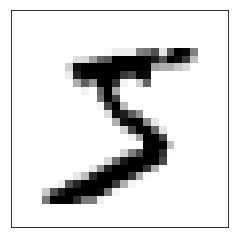

In [4]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0] , cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
y_train.shape

(60000,)

In [7]:
x_test.shape

(10000, 28, 28)

In [8]:
y_test.shape

(10000,)

In [0]:
x_train = x_train.reshape((60000, 28, 28, 1))

In [0]:

x_test = x_test.reshape((10000, 28, 28, 1))


In [11]:
model =Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))

model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))

model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))

model.add(Flatten())

model.add(Dense(64, activation='relu'))

model.add(Dense(10, activation='softmax'))


model.summary()


W0712 10:05:25.723070 139702603200384 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0712 10:05:25.750716 139702603200384 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0712 10:05:25.754523 139702603200384 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0712 10:05:25.776843 139702603200384 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                36928     
__________

In [12]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

W0712 10:05:25.859866 139702603200384 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0712 10:05:25.890209 139702603200384 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3341: The name tf.log is deprecated. Please use tf.math.log instead.



In [13]:
model.fit(x_train, y_train, epochs=5, batch_size=128)

W0712 10:05:25.998787 139702603200384 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0712 10:05:26.052768 139702603200384 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/5
60000/60000 [==============================] - 48s 794us/step - loss: 0.2517 - acc: 0.9255
Epoch 2/5
60000/60000 [==============================] - 47s 788us/step - loss: 0.0584 - acc: 0.9819
Epoch 3/5
60000/60000 [==============================] - 48s 793us/step - loss: 0.0406 - acc: 0.9876
Epoch 4/5
60000/60000 [==============================] - 47s 790us/step - loss: 0.0318 - acc: 0.9899
Epoch 5/5
60000/60000 [==============================] - 47s 786us/step - loss: 0.0263 - acc: 0.9914


In [14]:
test_loss, test_acc = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 3s 292us/step


In [15]:
test_acc

0.9899

In [16]:
test_loss

0.03067984294462949